In [1]:
from utils import *
from external_packages import *

In [2]:
final_stackset=pd.read_csv(processed_data_folder+'/final_stackset_PowerTransformer.csv',index_col=0)
final_stackset_features=final_stackset.drop(['ID','to_predict'],axis=1)
final_stackset_target=final_stackset.loc[:,['to_predict']]
final_stackset_target.groupby('to_predict')['to_predict'].count()

to_predict
0    999756
1       244
Name: to_predict, dtype: int64

In [3]:
X_train, X_test, y_train, y_test=train_test_split(final_stackset_features,final_stackset_target,
                        test_size=0.2,stratify=final_stackset_target,random_state =random_state )

In [4]:
pca = PCA(n_components=45)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

ROVS=over_sampling.RandomOverSampler(random_state=random_state)
X_train_over,y_train_over=ROVS.fit_resample(X_train_pca,y_train)


In [5]:
train_test_splits=[
#                 [X_train_pca,y_train,X_test_pca,y_test],
                [X_train_over,y_train_over,X_test_pca,y_test],
                ]

In [6]:
modeling=experiment()
modeling.train_test_splits=train_test_splits

In [7]:
sgdc=SGDClassifier(random_state=random_state,learning_rate='adaptive',eta0=0.1,penalty='l2',loss='modified_huber',
                  early_stopping=False,validation_fraction=0.38,
                  alpha=0.001, class_weight='balanced', epsilon=0.1)
modeling.run_model(sgdc)

In [8]:
ETC=ExtraTreesClassifier(class_weight='balanced',random_state=random_state,n_estimators=10,
                        min_weight_fraction_leaf=0.026842105263157893)
modeling.run_model(ETC)

In [9]:
target=['SGDClassifier', 'ExtraTreesClassifier']
VC=VotingClassifier([(name,model) for name,model in modeling.models.items() if name in target],
                   voting='hard')
modeling.run_model(VC)

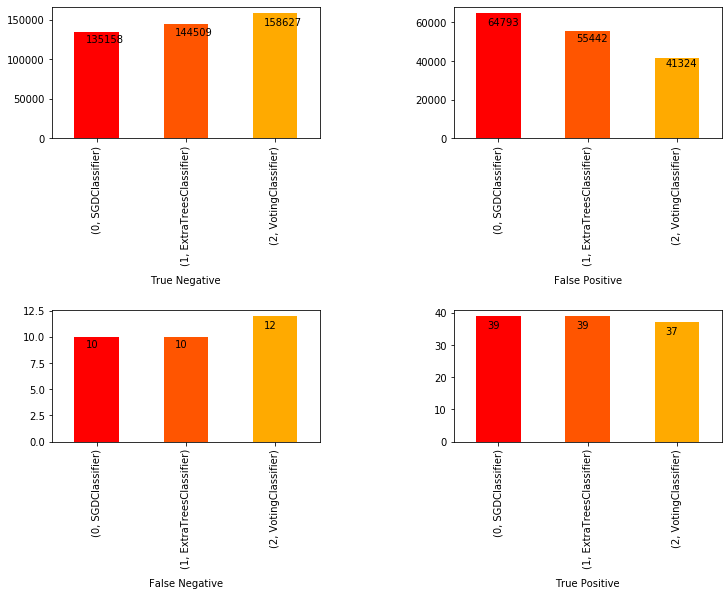

In [10]:
modeling.plot_comp(cmap_name='autumn',figsize=(12,8),)